<a href="https://colab.research.google.com/github/guilhermelaviola/BIArchitectureAndBigData/blob/main/Class04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Data Mining**
Data mining is the process of discovering patterns, correlations, associations, or anomalies in large data sets through statistical, mathematical, and machine learning techniques. Here we explore data mining in detail, showing how it works through code, and analyzing some practical examples.

In [2]:
# Importing all the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import spacy
import os

In [3]:
pd.set_option('display.max_columns', None)

# Importing and DataFrame:
url = 'https://raw.githubusercontent.com/AFAgarap/ecommerce-reviews-analysis/refs/heads/master/Womens%20Clothing%20E-Commerce%20Reviews.csv'
df = pd.read_csv(url)

# Displaying the DataFrame:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
# Displaying the DataFrame columns:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [6]:
# Converting the textx from 'Review Text' column to strings:
df['Review Text'] = df['Review Text'].fillna('').astype(str)
concat_text = ' '.join(df['Review Text'])
words = concat_text.lower().split()

In [7]:
# Counting the word frequency:
frequency = Counter(words)

# Creating and plotting a DataFrame with the word frequency:
df_frequency = pd.DataFrame(frequency.items(), columns=['Word', 'Frequency'])
df_frequency.sort_values(by='Frequency', ascending=False, inplace=True)
df_frequency.reset_index(drop=True, inplace=True)
df_frequency

,Word,Frequency
0,the,75768
1,i,58386
2,and,48513
3,a,42725
4,it,37429
...,...,...
37715,cutesy--it's,1
37716,summer--not,1
37717,~125,1
37718,"5'8"".)",1


In [8]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 89.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [9]:
nlp = spacy.load('en_core_web_sm')

# Filtering the adjectives in the DataFrame:
def find_adjectives(text):
  doc = nlp(text)
  adjectives = [token.text.lower() for token in doc if token.pos_ == 'ADJ']
  return adjectives

In [10]:
# Storing all the adjectives into an array:
all_adjectives = []

for evaluation in df['Review Text'].dropna():
  all_adjectives.extend(find_adjectives(evaluation))

In [11]:
# Counting the adjective frequency:
adjectives_frequency = Counter(all_adjectives)

# Creating and plotting a DataFrame with the adjective frequency:
df_adjectives = pd.DataFrame(adjectives_frequency.items(), columns=['Adjective', 'Frequency'])
df_adjectives.sort_values(by='Frequency', ascending=False, inplace=True)
df_adjectives.reset_index(drop=True, inplace=True)
df_adjectives

,Adjective,Frequency
0,great,6056
1,small,4277
2,perfect,3649
3,little,3473
4,soft,3329
...,...,...
3298,slovak,1
3299,heftier,1
3300,unsolvable,1
3301,unexciting,1


In [12]:
# Generating the adjective WordCloud:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(df_adjectives.set_index('Adjective')['Frequency'])

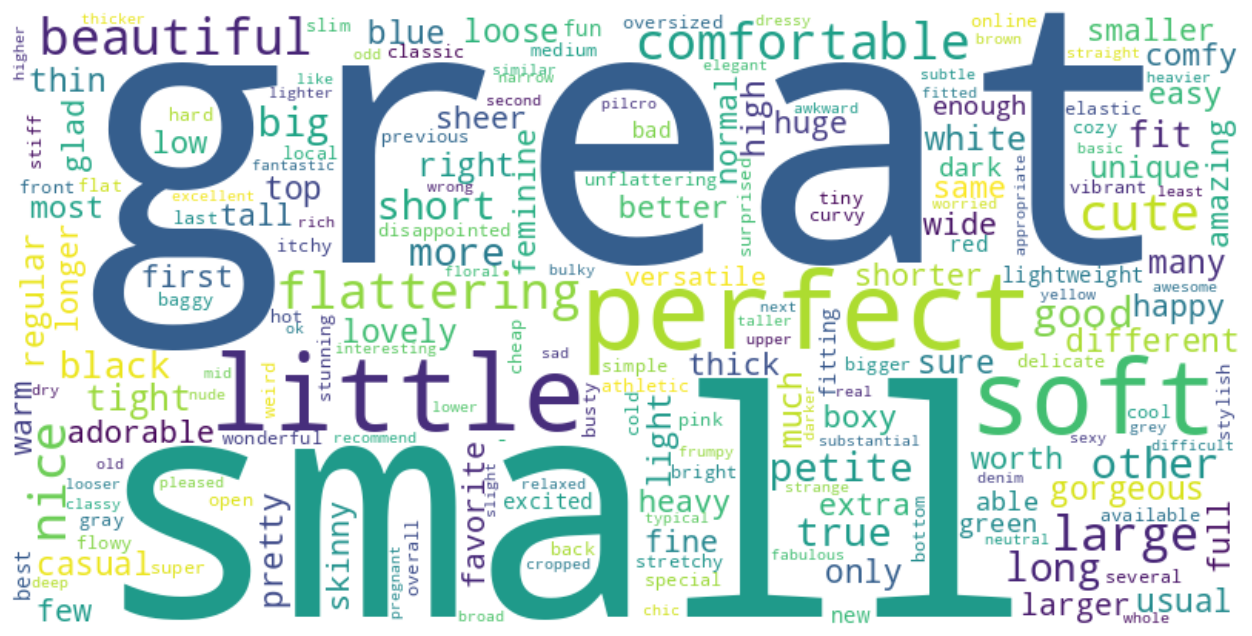

In [13]:
# Displaying the adjective WordCloud:
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()